# Informasi Diri
## Nama: Muhammad Lahia Ardhan
## Username: lahiardhan
## Email: lahia.ardhanm@gmail.com

# Import Library

In [1]:
import zipfile
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing import image
from os import getcwd
import pathlib
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers

# Download the Dataset

In [2]:
filePath = f"{getcwd()}/../tmp2/"

(train_examples, validation_examples), info = tfds.load('fashion_mnist',
                                                        data_dir=filePath,
                                                        with_info=True,
                                                        as_supervised=True,
                                                        split=['train[:80%]',
                                                                'train[80%:]'])

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /content/../tmp2/fashion_mnist/3.0.1.incompleteRDRVTW/fashion_mnist-train.tfrecord*...:   0%|       …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /content/../tmp2/fashion_mnist/3.0.1.incompleteRDRVTW/fashion_mnist-test.tfrecord*...:   0%|        …

Dataset fashion_mnist downloaded and prepared to /content/../tmp2/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [23]:
print(f'Total data: {len(train_examples) + len(validation_examples)}')
print(f'Jumlah data training: {len(train_examples)}')
print(f'Jumlah data validation: {len(validation_examples)}')

Total data: 60000
Jumlah data training: 48000
Jumlah data validation: 12000


In [3]:
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Create a labels.txt file with the class names
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [5]:
# The images in the dataset are 28 by 28 pixels.
IMG_SIZE = 28

# Preprocessing Data

## Preprocess


In [6]:
def format_example(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image/255.0 # Normalize the image in the range [0, 1]

    return image, label

In [7]:
# Specify the batch size
BATCH_SIZE = 256

## Create Datasets From Images and Labels

In [8]:
# Create Datasets
train_batches = train_examples.cache().shuffle(num_examples//4).batch(BATCH_SIZE).map(format_example).prefetch(1)
validation_batches = validation_examples.cache().batch(BATCH_SIZE).map(format_example)

# Build the model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])

model.compile(optimizer='RMSprop',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 64)                247872    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

# Train the model

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.9 and epoch >= 10):
      print("\nAkurasi melewati 90%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_batches,
    epochs = 20,
    validation_data = validation_batches,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
188/188 - 8s - loss: 0.6925 - accuracy: 0.7528 - val_loss: 0.4476 - val_accuracy: 0.8381 - 8s/epoch - 44ms/step
Epoch 2/20
188/188 - 1s - loss: 0.4196 - accuracy: 0.8498 - val_loss: 0.3723 - val_accuracy: 0.8683 - 827ms/epoch - 4ms/step
Epoch 3/20
188/188 - 1s - loss: 0.3504 - accuracy: 0.8752 - val_loss: 0.3534 - val_accuracy: 0.8729 - 818ms/epoch - 4ms/step
Epoch 4/20
188/188 - 1s - loss: 0.3147 - accuracy: 0.8869 - val_loss: 0.3391 - val_accuracy: 0.8763 - 748ms/epoch - 4ms/step
Epoch 5/20
188/188 - 1s - loss: 0.2869 - accuracy: 0.8959 - val_loss: 0.2916 - val_accuracy: 0.8928 - 747ms/epoch - 4ms/step
Epoch 6/20
188/188 - 1s - loss: 0.2641 - accuracy: 0.9044 - val_loss: 0.2794 - val_accuracy: 0.9020 - 770ms/epoch - 4ms/step
Epoch 7/20
188/188 - 1s - loss: 0.2462 - accuracy: 0.9087 - val_loss: 0.2752 - val_accuracy: 0.8991 - 997ms/epoch - 5ms/step
Epoch 8/20
188/188 - 1s - loss: 0.2305 - accuracy: 0.9158 - val_loss: 0.2463 - val_accuracy: 0.9128 - 849ms/epoch - 5ms/step
Ep

# Model Evaluation

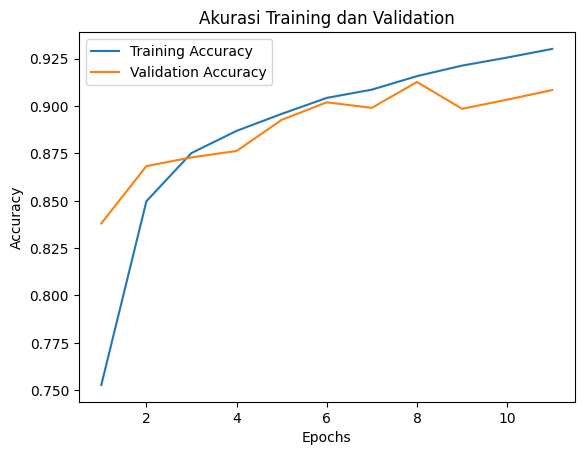

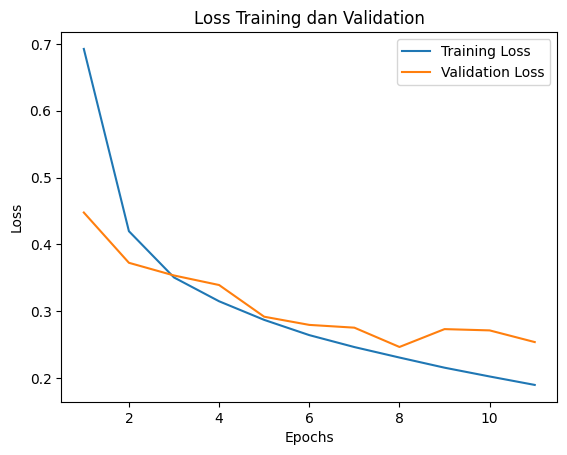

In [12]:
# Dapatkan nilai akurasi dan loss dari objek History
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot grafik akurasi
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("")

# Plot grafik loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Training dan Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exporting to TFLite


In [13]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [14]:
# Select mode of optimization
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [15]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization] # Set the optimzations

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [16]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

259728